In [122]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2026-01-29 04:35:03.036603


In [123]:
# Make the creating of our model a little easier
import os
import pandas as pd
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout, BatchNormalization
from tensorflow.keras import Sequential

In [124]:
# Walk through directory and list number of files
for dirpath, dirnames, filenames in os.walk("pen_pencil_dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pen_pencil_dataset'.
There are 2 directories and 0 images in 'pen_pencil_dataset\test'.
There are 0 directories and 40 images in 'pen_pencil_dataset\test\pen'.
There are 0 directories and 40 images in 'pen_pencil_dataset\test\pencil'.
There are 2 directories and 0 images in 'pen_pencil_dataset\train'.
There are 0 directories and 160 images in 'pen_pencil_dataset\train\pen'.
There are 0 directories and 160 images in 'pen_pencil_dataset\train\pencil'.


In [125]:
dataset_train = "pen_pencil_dataset/train/"
dataset_test = "pen_pencil_dataset/test/"

In [126]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir(f"{dataset_train}pen"))
num_steak_images_train

160

In [127]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
data_dir = pathlib.Path(f"{dataset_train}") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pen' 'pencil']


In [128]:
# View an image
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (300, 300, 3)


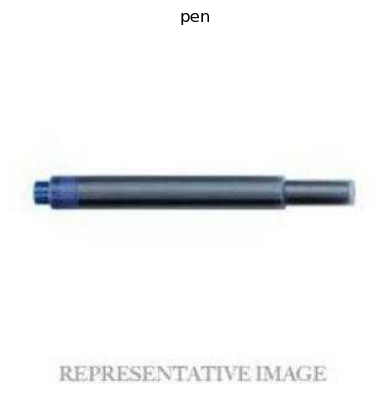

In [129]:
# View a random image from the training dataset
img = view_random_image(target_dir=f"{dataset_train}",target_class="pen")

In [130]:
# View the img (actually just a big array/tensor)
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [131]:
# View the image shape
img.shape # returns (width, height, colour channels)

(300, 300, 3)

In [132]:
# Get all the pixel values between 0 & 1
img/255. 

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [133]:
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = f"{dataset_train}"
test_dir = f"{dataset_test}"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


Image shape: (300, 300, 3)
Image shape: (480, 640, 3)


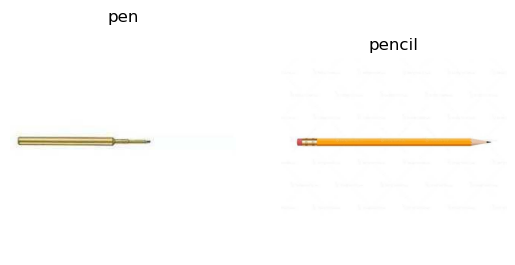

In [134]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image(f"{dataset_train}", "pen")
plt.subplot(1, 2, 2)
pizza_img = view_random_image(f"{dataset_train}", "pencil")

In [135]:
# Create train and test data generators and rescale the data 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [136]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [137]:
# Get a sample of the training data batch 
images, labels = next(train_data)
len(images), len(labels)

(32, 32)

In [138]:
# Get the first two images
images[:2], images[0].shape

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [139]:
# View the first batch of labels
labels

array([0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.],
      dtype=float32)

In [140]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(10, 3)

In [141]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [142]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [143]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 320 images belonging to 2 classes.
Non-augmented training images:
Found 320 images belonging to 2 classes.
Unchanged test images:
Found 80 images belonging to 2 classes.


In [144]:
# Get data batch samples
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented) # Note: labels aren't augmented, they stay the same

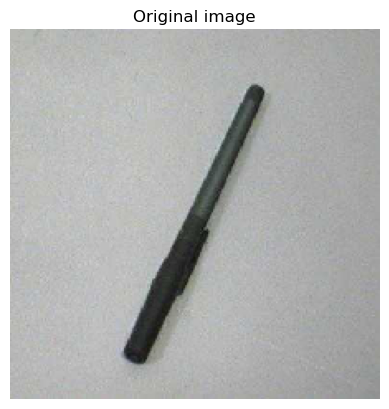

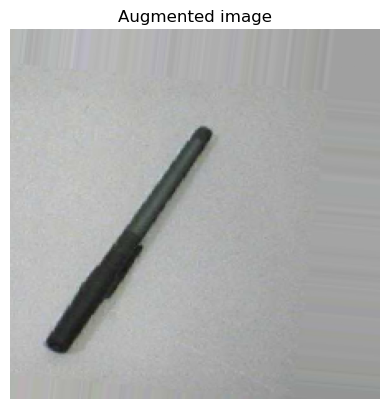

In [145]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [146]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 320 images belonging to 2 classes.


In [147]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dropout(0.5),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=13,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

c:\Users\Acer-Swift\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Acer-Swift\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/13
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.5219 - loss: 0.6989 - val_accuracy: 0.5000 - val_loss: 0.6801
Epoch 2/13
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5063 - loss: 0.6736 - val_accuracy: 0.5875 - val_loss: 0.6432
Epoch 3/13
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6656 - loss: 0.6406 - val_accuracy: 0.8000 - val_loss: 0.5476
Epoch 4/13
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6906 - loss: 0.6082 - val_accuracy: 0.8625 - val_loss: 0.4910
Epoch 5/13
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8062 - loss: 0.5537 - val_accuracy: 0.8750 - val_loss: 0.4041
Epoch 6/13
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8438 - loss: 0.4901 - val_accuracy: 0.9000 - val_loss: 0.3492
Epoch 7/13
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8531 - loss: 0.4346 - val_accuracy: 0.9125 - val_loss: 0.2772
Epoch 8/13
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 996ms/step - accuracy: 0.8531 - loss: 0.3856 - val_accuracy: 0.9000 - val_lo

In [148]:
# Check model_8 architecture (same as model_1)
model_8.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

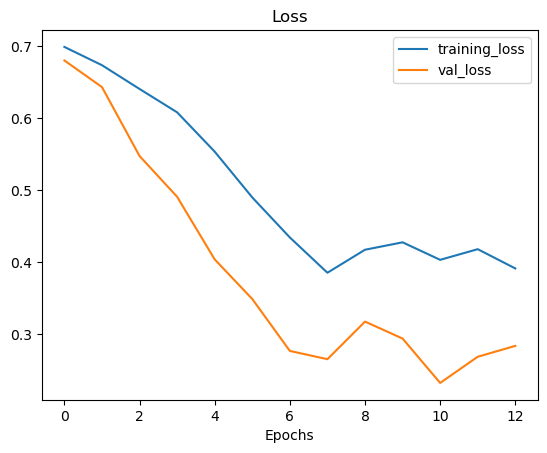

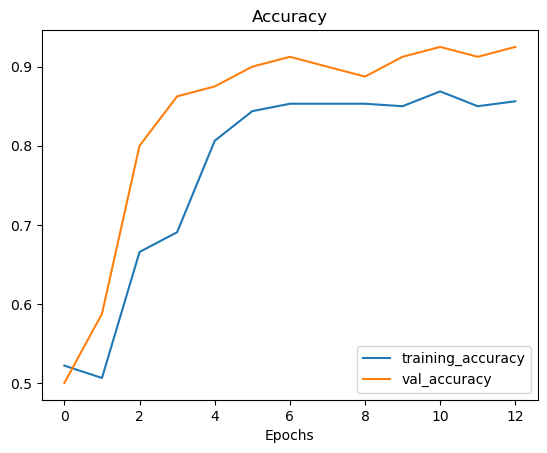

In [149]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

In [150]:
# Classes we're working with
print(class_names)

['pen' 'pencil']


(np.float64(-0.5), np.float64(464.5), np.float64(464.5), np.float64(-0.5))

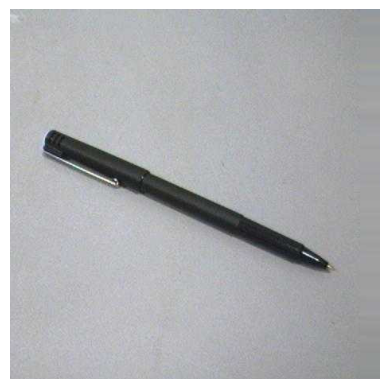

In [151]:
# View our example image
pen = mpimg.imread(f"{dataset_test}/pen/pen1.jpg")
plt.imshow(pen)
plt.axis(False)

In [152]:
# Check the shape of our image
pen.shape

(465, 465, 3)

In [153]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [154]:
# Load in and preprocess our custom image
pen = load_and_prep_image(f"{dataset_test}/pen/pen1.jpg")
pen


<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6804958 , 0.6961821 , 0.7079468 ],
        [0.69540215, 0.7110884 , 0.7228531 ],
        [0.7029335 , 0.71861976, 0.73038447],
        ...,
        [0.5647059 , 0.60784316, 0.6313726 ],
        [0.5647059 , 0.60784316, 0.6313726 ],
        [0.5647059 , 0.60784316, 0.6313726 ]],

       [[0.7042531 , 0.71993935, 0.73170406],
        [0.6612621 , 0.67694837, 0.68871313],
        [0.71970415, 0.7353904 , 0.74715513],
        ...,
        [0.5686275 , 0.6039216 , 0.62352943],
        [0.5686275 , 0.6039216 , 0.62352943],
        [0.5686275 , 0.6039216 , 0.62352943]],

       [[0.7095599 , 0.7252462 , 0.7370109 ],
        [0.706603  , 0.72228926, 0.73405397],
        [0.6748905 , 0.6905768 , 0.7023415 ],
        ...,
        [0.57254905, 0.6018656 , 0.6197982 ],
        [0.57254905, 0.6016603 , 0.6202088 ],
        [0.57254905, 0.60145503, 0.62061936]],

       ...,

       [[0.6891047 , 0.6851831 , 0.70479095],
        [0.69

In [155]:
# Add an extra axis
print(f"Shape before new dimension: {pen.shape}")
pen = tf.expand_dims(pen, axis=0) # add an extra dimension at axis 0
#pen = pen[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {pen.shape}")
pen

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6804958 , 0.6961821 , 0.7079468 ],
         [0.69540215, 0.7110884 , 0.7228531 ],
         [0.7029335 , 0.71861976, 0.73038447],
         ...,
         [0.5647059 , 0.60784316, 0.6313726 ],
         [0.5647059 , 0.60784316, 0.6313726 ],
         [0.5647059 , 0.60784316, 0.6313726 ]],

        [[0.7042531 , 0.71993935, 0.73170406],
         [0.6612621 , 0.67694837, 0.68871313],
         [0.71970415, 0.7353904 , 0.74715513],
         ...,
         [0.5686275 , 0.6039216 , 0.62352943],
         [0.5686275 , 0.6039216 , 0.62352943],
         [0.5686275 , 0.6039216 , 0.62352943]],

        [[0.7095599 , 0.7252462 , 0.7370109 ],
         [0.706603  , 0.72228926, 0.73405397],
         [0.6748905 , 0.6905768 , 0.7023415 ],
         ...,
         [0.57254905, 0.6018656 , 0.6197982 ],
         [0.57254905, 0.6016603 , 0.6202088 ],
         [0.57254905, 0.60145503, 0.62061936]],

        ...,

        [[0.6891047 , 0.6851831 , 

In [156]:
# Make a prediction on custom image tensor
pred = model_8.predict(pen)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


array([[0.15714839]], dtype=float32)

In [157]:
# Remind ourselves of our class names
class_names

array(['pen', 'pencil'], dtype='<U6')

In [158]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

np.str_('pen')

In [198]:
def pred_and_plot(model, filename, class_names):
  # Import the target image and preprocess it
  select_class = random.choice(class_names)
  name = f"{filename}{select_class}/"
  file = f"{name}{random.sample(os.listdir(name), 1)[0]}"

  img = load_and_prep_image(file)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  # 1. Get the raw probability
  prob = pred[0][0] 

  # 2. Determine the predicted class (0 or 1)
  predicted_class = 1 if prob > 0.5 else 0

  # 3. Calculate Confidence (how "sure" the model is)
  # If prob is 0.9, confidence is 0.9. If prob is 0.1, confidence is 0.9.
  confidence = prob if predicted_class == 1 else (1 - prob)

  print(f"Predicted Class: {predicted_class}")
  print(f"Confidence: {confidence:.2%}")

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction {confidence:.2%}: {pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted Class: 1
Confidence: 99.65%


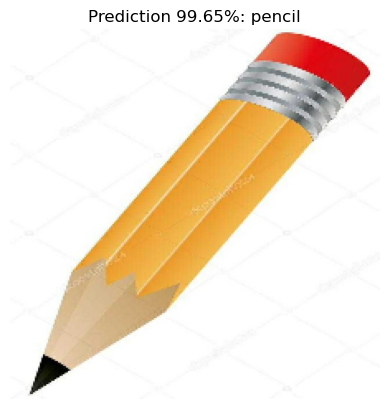

In [223]:
# Test our model on a custom image

pred_and_plot(model_8, dataset_test, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


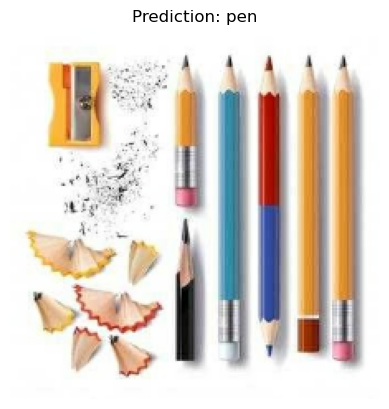

In [175]:
# Download another test image and make a prediction on it
pred_and_plot(model_8, dataset_test, class_names)

## 📖 Extra-curriculum

1. **Watch:** [MIT's Introduction to Deep Computer Vision](https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3) lecture. This will give you a great intuition behind convolutional neural networks.

2. **Watch:** Deep dive on [mini-batch gradient descent](https://youtu.be/-_4Zi8fCZO4) by deeplearning.ai. If you're still curious about why we use **batches** to train models, this technical overview covers many of the reasons why.

3. **Read:** [CS231n Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/convolutional-networks/) class notes. This will give a very deep understanding of what's going on behind the scenes of the convolutional neural network architectures we're writing. 

4. **Read:** ["A guide to convolution arithmetic for deep learning"](https://arxiv.org/pdf/1603.07285.pdf). This paper goes through all of the mathematics running behind the scenes of our convolutional layers.

5. **Code practice:** [TensorFlow Data Augmentation Tutorial](https://www.tensorflow.org/tutorials/images/data_augmentation). For a more in-depth introduction on data augmentation with TensorFlow, spend an hour or two reading through this tutorial.